In [ ]:

# A histogram is a graph showing frequency distributions.
# aio = All In One

# Import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
# Load a CSV file into a Pandas DataFrame
df = pd.read_csv("datos_limpios_Empresas.csv")

In [ ]:
# Return a tuple representing the dimensionality of the DataFrame.
# First value  = Number of Rows including the header.
# Second value = Number of Columns.
df.shape

In [ ]:
df

In [8]:
# Get the frequency table for the column mACROSECTOR
df.MACROSECTOR.value_counts().sort_index()
valores_cantidad = df.MACROSECTOR.unique()
valores_cantidad

array(['MINERO', 'MANUFACTURA', 'COMERCIO', 'SERVICIOS', 'CONSTRUCCIÓN',
       'AGROPECUARIO'], dtype=object)

ConversionError: Failed to convert value(s) to axis units: array(['MINERO', 'MANUFACTURA', 'COMERCIO', 'SERVICIOS', 'CONSTRUCCIÓN',
       'AGROPECUARIO'], dtype=object)

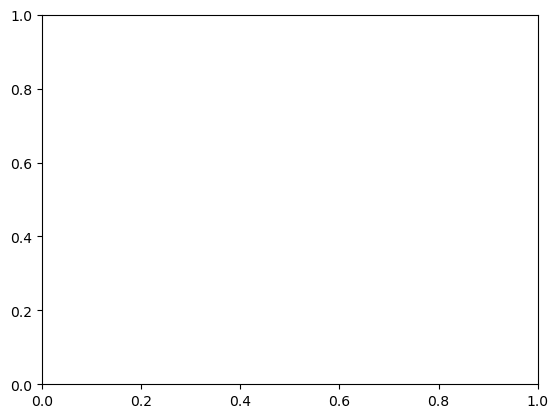

In [9]:
# Get the number of deaths without repetitions
valores_cantidad = df.MACROSECTOR.unique()
valores_cantidad
# Make sure all values ​​on the X axis are visible
plt.xticks(valores_cantidad)

# Function to format values ​​with thousands separators
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(',', '.'))

# Format the Y axis
plt.gca().yaxis.set_major_formatter(formatter)

# Add tags and title
plt.title('Histograma de CANTIDAD de EMPRESAS POR SECTOR')
plt.xlabel('Cantidad de Sector')
plt.ylabel('Frecuencia')

# Filter to exclude rows
# df = df[~df.CANTIDAD.isin([1,2])]
# df = df[df.GENERO.isin(['MASCULINO'])]

# Create a histogram with CANTIDAD column
n, bins, patches = plt.hist(df.MACROSECTOR, color="gray")

# Add frequency labels above each bar, in thousands format
for i in range(len(n)):
    plt.text(bins[i] + 0.5, n[i] + 0.1, f'{int(n[i]):,}'.replace(',', '.'), ha='center', va='bottom', fontsize=10)

# Display the histogram
plt.show()


     